In [1]:
import numpy as np
import pylab as plt

In [3]:
''' PARTICLE FILTERS '''

def motion_mdl(state, distance=0.5):
    '''
    Motion model for a particle filter
    state: [x, y, f] - x, y: position, f: angle
    distance: distance moved
    '''
    x, y, f = state
    f = f + np.random.normal(f, 0.1)
    d = np.random.normal(distance, 0.02)
    x += d*np.cos(f)
    y += d*np.sin(f)

    return x, y, f

def prediction(particles, samples=10):
    '''
    Predict the next state of the particles
    '''
    return [motion_mdl(state) for _ in range(samples) for state in particles]

def estimate(particles):
    '''
    Estimate the position of the particles
    '''
    p = np.array(particles)
    return np.mean(p, axis=0)

def weight(measurement, state):
    '''
    Weight of the particles
    '''
    x, y, f = state

(np.float64(0.48853142774675834), np.float64(-0.029257139015046656), -0.059816492634540044)


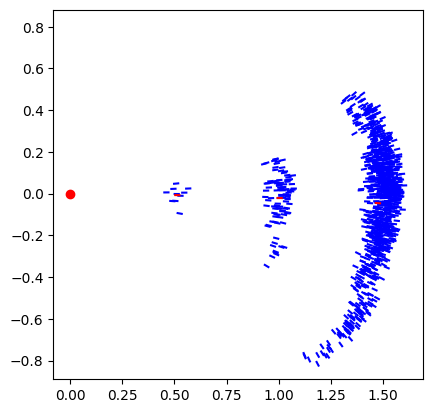

In [4]:
if __name__ == '__main__':
    iter = 3
    initial_state = 0, 0, 0
    print(motion_mdl((0, 0, 0)))

    x, y, _ = initial_state
    plt.plot(x, y, 'ro')

    p = [initial_state]

    for i in range(iter):
        p = prediction(p)

        for state in p:
            x, y, f = state
            plt.plot([x, x +0.02*np.cos(f)], [y, y+0.02*np.sin(f)], 'b-')

        x, y, f = estimate(p)
        plt. plot([x, x +0.02*np.cos(f)], [y, y+0.02*np.sin(f)], 'r-')
    # x, y, f = motion_mdl(initial_state)
    # plt.plot([x, x +0.02*np.cos(f)], [y, y+0.02*np.sin(f)], 'b-')

    plt.axis('square')
    plt.show()